In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = 'crimes_cleaned.csv'  # Upload this CSV file to Colab or provide the correct path
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
data.head()


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,ANDHRA PRADESH,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,ANDHRA PRADESH,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,ANDHRA PRADESH,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,ANDHRA PRADESH,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [3]:
# Drop non-numeric columns like STATE/UT and DISTRICT, if these are not needed
data = data.drop(columns=['STATE/UT', 'DISTRICT'])

# Check for missing values
data.isnull().sum()

# Fill or drop missing values if necessary
# data = data.fillna(data.mean())  # or data.dropna()

# Splitting data into features (X) and target variable (y)
# For this example, let's predict 'TOTAL IPC CRIMES' as the target
X = data.drop(columns=['TOTAL IPC CRIMES'])
y = data['TOTAL IPC CRIMES']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R2 Score: 0.9999999999991817
Linear Regression MSE: 1.1713681405954478e-05


## Above , the results of Linear Regression are shown

In [5]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'KNN': KNeighborsRegressor(),
    
    'Gradient Boosting': GradientBoostingRegressor(),
    
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}

# Print out the results
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

KNN: MSE = 98954.7042, R2 = 0.9931
Gradient Boosting: MSE = 62066.4944, R2 = 0.9957


## Above , the results of KNN and Gradient Boosting are shown

# ML Models Usage

## Machine Learning Models

## Aim 1: Predicting the Total Number of Crimes Based on All Features





In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt


In [7]:
# Load the dataset
file_path = 'crimes_cleaned.csv'  
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
data.head()


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,ANDHRA PRADESH,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,ANDHRA PRADESH,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,ANDHRA PRADESH,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,ANDHRA PRADESH,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [8]:
# Drop non-numeric columns like STATE/UT and DISTRICT, if these are not needed
data = data.drop(columns=['STATE/UT', 'DISTRICT'])

# Check for missing values
data.isnull().sum()


# For this example, let's predict 'TOTAL IPC CRIMES' as the target
X = data.drop(columns=['TOTAL IPC CRIMES'])
y = data['TOTAL IPC CRIMES']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R2 Score: 0.9999999999991817
Linear Regression MSE: 1.1713681405954478e-05


###  Aim 2: Predicting the Total Number of Crimes Using Top 5 Features



In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('crimes_cleaned.csv')


label_encoder = LabelEncoder()
df['STATE/UT'] = label_encoder.fit_transform(df['STATE/UT'])
df['DISTRICT'] = label_encoder.fit_transform(df['DISTRICT'])

#  3: Calculate the variance-covariance matrix between features
# Exclude the target column `TOTAL IPC CRIMES` and categorical columns like 'STATE/UT', 'DISTRICT'
features = df.drop(columns=['TOTAL IPC CRIMES', 'STATE/UT', 'DISTRICT'])
cov_matrix = features.cov()

# Calculate covariance of each feature with the target variable
cov_with_target = df.cov()['TOTAL IPC CRIMES'].drop(['TOTAL IPC CRIMES', 'STATE/UT', 'DISTRICT'])

# Select the top 5 features with the highest covariance (absolute value) with the target variable
top_5_features = cov_with_target.abs().sort_values(ascending=False).head(5).index
print("\nTop 5 Features based on Covariance with Target:")
print(top_5_features)

#  4: Split the dataset using the selected features
X = df[top_5_features]
y = df['TOTAL IPC CRIMES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  5: Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R²: {r2}")



Top 5 Features based on Covariance with Target:
Index(['OTHER IPC CRIMES', 'THEFT', 'OTHER THEFT', 'AUTO THEFT',
       'HURT/GREVIOUS HURT'],
      dtype='object')

Training Linear Regression...
Model: Linear Regression
Mean Squared Error (MSE): 190860.25625476654
R²: 0.986666426463999

Training K-Nearest Neighbors...
Model: K-Nearest Neighbors
Mean Squared Error (MSE): 157886.30617021277
R²: 0.9889699997529185

Training Gradient Boosting...
Model: Gradient Boosting
Mean Squared Error (MSE): 161932.86414667498
R²: 0.9886873056006336


# Aim 3: Categorizing Districts Based on Crime Levels

         STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH   ADILABAD  2013      96                 72   
1  ANDHRA PRADESH  ANANTAPUR  2013     156                149   
2  ANDHRA PRADESH   CHITTOOR  2013      72                 61   
3  ANDHRA PRADESH   CUDDAPAH  2013      93                107   
4  ANDHRA PRADESH  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          61                      65  ...     30                2394   
1          28                     110  ...

C:\Users\Prakash\AppData\Local\Temp\ipykernel_38472\527545063.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CRIME_LABEL'].fillna(data['CRIME_LABEL'].mode()[0], inplace=True)


Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96        62
           2       0.95      0.98      0.96       219
           3       0.94      0.84      0.89       178
           4       0.94      0.95      0.95       400
           5       0.99      1.00      1.00      1961

    accuracy                           0.98      2820
   macro avg       0.96      0.94      0.95      2820
weighted avg       0.98      0.98      0.98      2820

Accuracy: 97.91%
Cross-validation accuracy: 97.85%
Feature Importance:
                  Feature  Importance
29       TOTAL IPC CRIMES    0.128891
28       OTHER IPC CRIMES    0.079248
13                  THEFT    0.069631
15            OTHER THEFT    0.064857
21     HURT/GREVIOUS HURT    0.044726
..                    ...         ...
164   DISTRICT_BHIM NAGAR    0.000000
79       DISTRICT_ALIGARH    0.000000
768  DISTRICT_SILIGURI_PC    0.000000
572   DISTRICT_METRO RAIL    0.000000

C:\Users\Prakash\AppData\Local\Temp\ipykernel_38472\527545063.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_crime_class = data.groupby(['STATE/UT', 'CRIME_LABEL']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

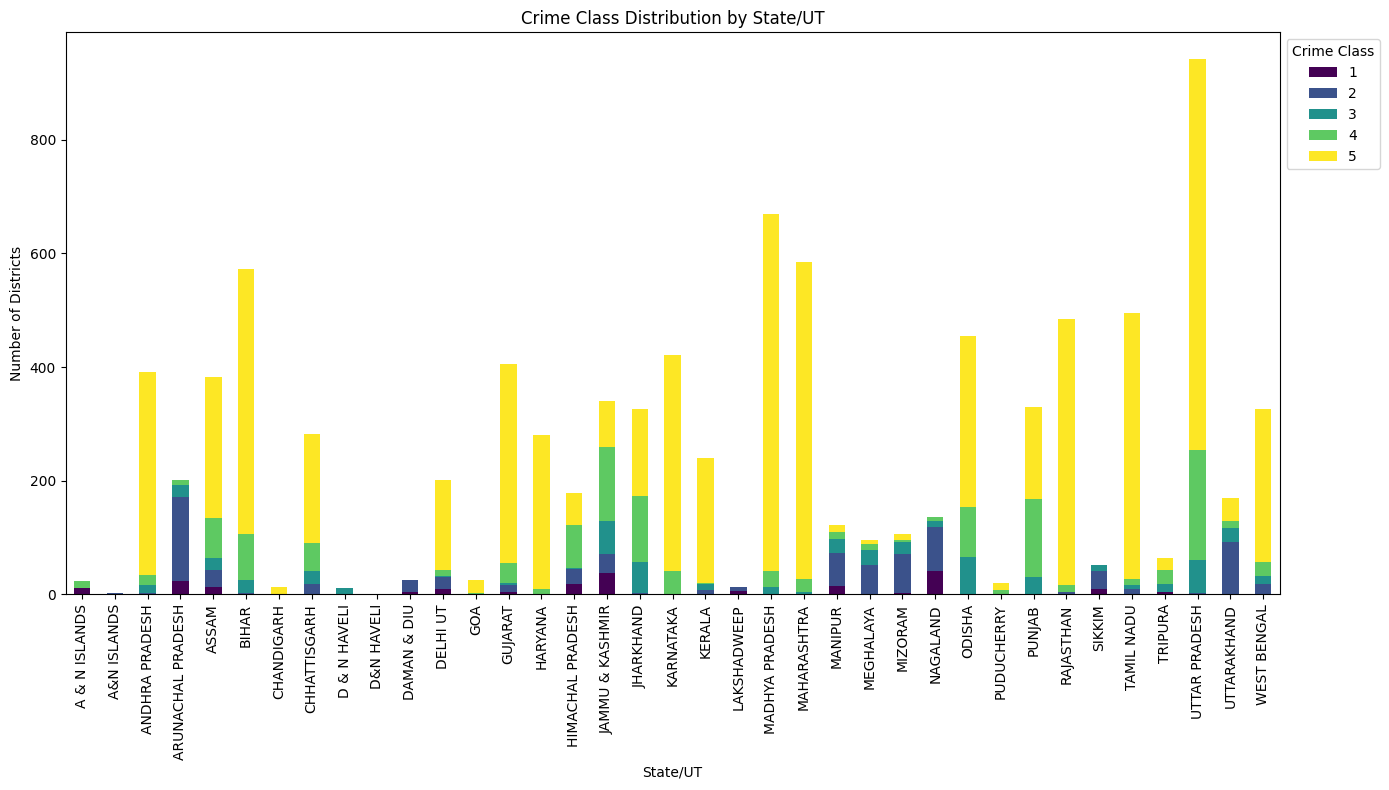

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Load the dataset
data = pd.read_csv("crimes_cleaned.csv")

# Check the first few rows
print(data.head())

# Data Preprocessing
# Convert 'YEAR' to categorical (it is not useful as a numeric feature for this task)
data['YEAR'] = data['YEAR'].astype(str)

# Handle missing values (if any)
data.fillna(0, inplace=True)

# Create a new feature 'TOTAL_CRIMES' by summing crime-related columns
crime_columns = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
                 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 
                 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
                 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 
                 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 
                 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 
                 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 
                 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 
                 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 
                 'OTHER IPC CRIMES']

data['TOTAL_CRIMES'] = data[crime_columns].sum(axis=1)

# Label the districts into 5 crime classes based on the 'TOTAL_CRIMES'
crime_bins = [0, 50, 300, 600, 1200, np.inf]  # Define the ranges for crime classes
crime_labels = [1, 2, 3, 4, 5]  # The labels for the five crime classes

# Apply the binning process
data['CRIME_LABEL'] = pd.cut(data['TOTAL_CRIMES'], bins=crime_bins, labels=crime_labels)

# Check if there are any NaN values in CRIME_LABEL
print(f"Missing values in 'CRIME_LABEL': {data['CRIME_LABEL'].isnull().sum()}")

# If there are NaN values in CRIME_LABEL, fill them with the most common crime label (or any default value)
data['CRIME_LABEL'].fillna(data['CRIME_LABEL'].mode()[0], inplace=True)

# Now, encode categorical columns ('State/UT' and 'District') using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['STATE/UT', 'DISTRICT'], drop_first=True)

# Feature selection (excluding 'CRIME_LABEL', 'YEAR' for simplicity)
X = data_encoded.drop(columns=['CRIME_LABEL', 'YEAR', 'TOTAL_CRIMES'])
y = data_encoded['CRIME_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional but often recommended for better model performance)
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Cross-validation (optional)
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualizing Crime Class Distribution by State
state_crime_class = data.groupby(['STATE/UT', 'CRIME_LABEL']).size().unstack(fill_value=0)

# Plotting the crime class distribution by state
plt.figure(figsize=(12, 8))
state_crime_class.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Crime Class Distribution by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Districts')
plt.legend(title='Crime Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()



# Aim 3 : Add ON : Categorizing Districts Based on Crime Levels using TOP 6 Features

         STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH   ADILABAD  2013      96                 72   
1  ANDHRA PRADESH  ANANTAPUR  2013     156                149   
2  ANDHRA PRADESH   CHITTOOR  2013      72                 61   
3  ANDHRA PRADESH   CUDDAPAH  2013      93                107   
4  ANDHRA PRADESH  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          61                      65  ...     30                2394   
1          28                     110  ...

C:\Users\Prakash\AppData\Local\Temp\ipykernel_38472\1091285152.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CRIME_LABEL'].fillna(data['CRIME_LABEL'].mode()[0], inplace=True)


Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        62
           2       0.91      0.93      0.92       219
           3       0.90      0.90      0.90       178
           4       0.93      0.91      0.92       400
           5       0.99      0.99      0.99      1961

    accuracy                           0.97      2820
   macro avg       0.92      0.93      0.92      2820
weighted avg       0.97      0.97      0.97      2820

Accuracy: 96.56%
Cross-validation accuracy: 95.75%
Feature Importance:
                  Feature  Importance
5        OTHER IPC CRIMES    0.338884
3                   THEFT    0.285218
1      HURT/GREVIOUS HURT    0.127495
4                BURGLARY    0.112470
0                  MURDER    0.073162
2  KIDNAPPING & ABDUCTION    0.062771


C:\Users\Prakash\AppData\Local\Temp\ipykernel_38472\1091285152.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_crime_class = data.groupby(['STATE/UT', 'CRIME_LABEL']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

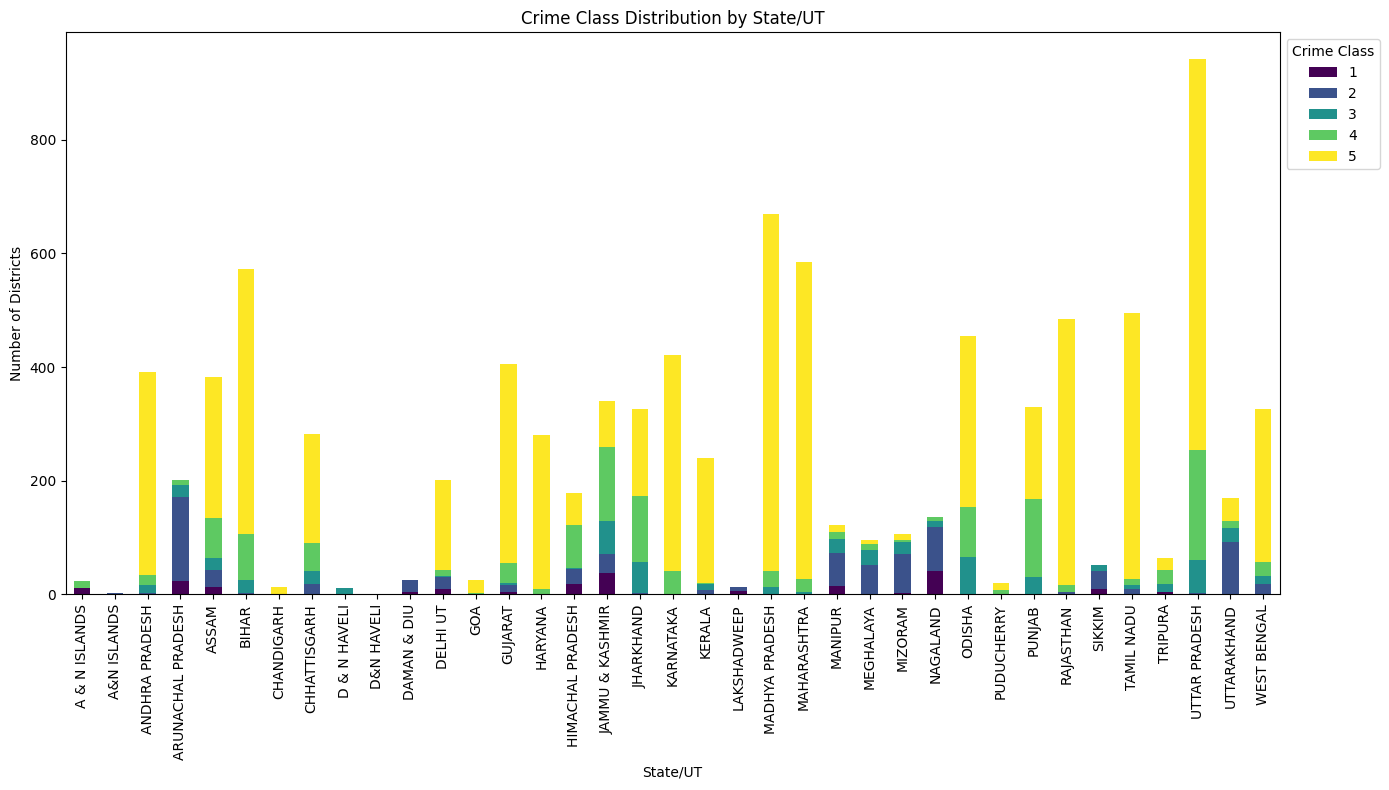

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Load the dataset
data = pd.read_csv("crimes_cleaned.csv")

# Check the first few rows
print(data.head())

# Data Preprocessing
# Convert 'YEAR' to categorical (it is not useful as a numeric feature for this task)
data['YEAR'] = data['YEAR'].astype(str)

# Handle missing values (if any)
data.fillna(0, inplace=True)

# Create a new feature 'TOTAL_CRIMES' by summing crime-related columns
crime_columns = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
                 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 
                 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
                 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 
                 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 
                 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 
                 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 
                 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 
                 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 
                 'OTHER IPC CRIMES']

data['TOTAL_CRIMES'] = data[crime_columns].sum(axis=1)

# Label the districts into 5 crime classes based on the 'TOTAL_CRIMES'
crime_bins = [0, 50, 300, 600, 1200, np.inf]  # Define the ranges for crime classes
crime_labels = [1, 2, 3, 4, 5]  # The labels for the five crime classes

# Apply the binning process
data['CRIME_LABEL'] = pd.cut(data['TOTAL_CRIMES'], bins=crime_bins, labels=crime_labels)

# Check if there are any NaN values in CRIME_LABEL
print(f"Missing values in 'CRIME_LABEL': {data['CRIME_LABEL'].isnull().sum()}")

# If there are NaN values in CRIME_LABEL, fill them with the most common crime label (or any default value)
data['CRIME_LABEL'].fillna(data['CRIME_LABEL'].mode()[0], inplace=True)

# Select only the desired features and target variable
selected_features = ['MURDER', 'HURT/GREVIOUS HURT', 'KIDNAPPING & ABDUCTION', 'THEFT', 'BURGLARY','OTHER IPC CRIMES']
X = data[selected_features]
y = data['CRIME_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional but often recommended for better model performance)
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Cross-validation (optional)
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualizing Crime Class Distribution by State
state_crime_class = data.groupby(['STATE/UT', 'CRIME_LABEL']).size().unstack(fill_value=0)

# Plotting the crime class distribution by state
plt.figure(figsize=(12, 8))
state_crime_class.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Crime Class Distribution by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Districts')
plt.legend(title='Crime Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


# Crimes in India: Analyzing Patterns and Predictions (2001-2013)

### Authors:
- Mrunal Pravin Kulkarni (22183)
- Darshana Srivathsan (22001)
- Prakash Kumbhakar (22241)

### Course:
**DSE 315: Data Science in Practice**